<a href="https://colab.research.google.com/github/shahiryar/conflict-modelling/blob/main/Conflict_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
## Problem statement
The objective of this project is to develop a predictive model using Support Vector Machines (SVM) to determine the likelihood of conflicts or civil unrest in a specific region or country. By analyzing historical data and various socio-economic, political, and demographic factors, the model aims to provide early warning indicators and insights that can help policymakers and organizations proactively address potential conflicts.



# TODOs:
- Change Target variable to number of instances of conflicts
- Feature selection
- Feature scaling
- Deal with Categorical Data

# Data Needs

## Data Needed

The data needed:
> Socio-Economic Indicator
* Year
* GDP
* Gini Coef
* Literacy Rate
* health indicators
* infrstructure development
* employment level
* percent of labor force by total population
* dependency ratio
* income level
* per captia income
* umemployment rate

> Political Idicators
* World Wide Governance Indicator
* Democracy Index
* poltical Instability Task Force

> Demographic
* Ethnic/Religion make up
* population density
* urbanisation rate
* size of middle class 
* migration patterns
* age structure (middle quantile)

> Environmental
* per captia water availabilty
* deforestation rate
* Climate change impact
* natural disaster

> Conflict Related
* Type of Conflict/unrest
* Casualities
* number of conflicts (in the year under review)

[Link](https://colab.research.google.com/drive/1bO-ccukQ-ZdE8mIQwBhHYU3ysM_sjC3b#scrollTo=l48gd4osbfAP)

## Code

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/20year-world-soci-politico-economic.csv', na_values='..', )

In [4]:
df.head()

,Time,Time Code,Country Name,Country Code,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",...,Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST],Rule of Law: Estimate [RL.EST],Voice and Accountability: Estimate [VA.EST],Adequacy of social insurance programs (% of total welfare of beneficiary households) [per_si_allsi.adq_pop_tot],Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot],Coverage of social safety net programs in poorest quintile (% of population) [per_sa_allsa.cov_q1_tot],International migrant stock (% of population) [SM.POP.TOTL.ZS],"Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]"
0,2022,YR2022,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,YR2022,Bangladesh,BGD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.928,4.699
2,2022,YR2022,Bhutan,BTN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.670,3.604
3,2022,YR2022,India,IND,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.224,7.330
4,2022,YR2022,Maldives,MDV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.126,4.883


## Data Cleaning

In [5]:
df.describe()

,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+) [FX.OWN.TOTL.ZS],GDP per capita (constant LCU) [NY.GDP.PCAP.KN],Gross capital formation (constant LCU) [NE.GDI.TOTL.KN],Trade (% of GDP) [NE.TRD.GNFS.ZS],...,Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST],Rule of Law: Estimate [RL.EST],Voice and Accountability: Estimate [VA.EST],Adequacy of social insurance programs (% of total welfare of beneficiary households) [per_si_allsi.adq_pop_tot],Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot],Coverage of social safety net programs in poorest quintile (% of population) [per_sa_allsa.cov_q1_tot],International migrant stock (% of population) [SM.POP.TOTL.ZS],"Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]"
count,4280.000000,4266.000000,4266.000000,4729.000000,4544.000000,4676.000000,653.000000,3.895000e+03,2.897000e+03,4360.000000,...,3701.000000,3869.000000,3861.000000,3853.000000,394.000000,411.000000,428.000000,784.000000,4692.000000,4692.000000
mean,62.561839,53.009329,72.741742,80.797980,75.377445,90.595375,57.602542,2.060684e+06,4.820892e+13,85.742416,...,1.970373,-0.027057,-0.027847,-0.022646,36.225760,20.665637,52.998388,10.218443,16.874527,7.732645
std,37.923590,41.188944,34.310303,28.071220,33.601625,17.446701,29.153401,1.242495e+07,4.829748e+14,55.922315,...,1.438138,0.999585,0.995386,0.998810,42.421437,18.227067,28.794172,15.260712,11.237297,5.356714
min,0.000000,0.000000,0.000000,0.643132,0.522863,3.429757,0.400000,3.608784e+02,-8.634937e+15,0.756876,...,0.005400,-3.312951,-2.590877,-2.313395,0.242614,0.370971,0.000000,0.052003,0.304000,0.095000
25%,23.075000,6.788960,46.613441,66.170357,52.408893,90.090456,33.390000,1.605809e+04,1.394515e+10,53.211282,...,1.143856,-0.667904,-0.791663,-0.857851,25.008318,5.402161,28.941540,1.373828,9.174912,4.174250
50%,78.850000,54.650000,93.000000,98.091935,96.720040,99.595647,55.350000,4.992233e+04,1.702352e+11,72.435251,...,1.615470,0.069970,-0.181318,0.024783,33.241091,11.515865,53.903945,3.663202,14.344520,6.320000
75%,99.900000,99.900000,100.000000,100.000000,100.000000,100.000000,85.380000,3.404266e+05,1.397067e+12,102.383770,...,2.380104,0.839443,0.764781,0.876453,42.483496,36.338993,79.367049,11.739982,22.256000,9.854250
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.768178e+08,6.152640e+15,863.195099,...,20.865745,1.965062,2.124782,1.800992,811.547901,59.520414,99.858678,88.404048,78.778000,37.320000


In [6]:
df_cf = pd.read_csv('/content/drive/MyDrive/Datasets/ucdp-nonstate-221.csv')

In [7]:
df_cf.columns

Index(['conflict_id', 'dyad_id', 'org', 'side_a_name', 'side_a_name_fulltext',
       'side_a_name_mothertongue', 'side_a_id', 'side_a_components',
       'side_a_2nd', 'gwno_a_2nd', 'side_b_name', 'side_b_name_fulltext',
       'side_b_name_mothertongue', 'side_b_id', 'side_b_components',
       'side_b_2nd', 'gwno_b_2nd', 'start_date', 'start_prec', 'start_date2',
       'start_prec2', 'ep_end', 'ep_end_date', 'ep_end_prec', 'year',
       'best_fatality_estimate', 'low_fatality_estimate',
       'high_fatality_estimate', 'location', 'gwno_location', 'region',
       'version'],
      dtype='object')

In [8]:
features=['year', 'location', 'best_fatality_estimate']
df_cf = df_cf[features]
df_cf['location'] = df_cf.location.str.split(',')

In [9]:
df_cf = df_cf.explode('location').reset_index(drop=True)
df_cf.head()

,year,location,best_fatality_estimate
0,2021,Nigeria,41
1,2013,Guinea,98
2,2021,Sudan,412
3,2005,Sudan,130
4,2017,Sudan,41


In [10]:
df_cf['location'] = df_cf.location.str.strip()

In [11]:
features = ['year', 'country', 'best_fatality_estimate']
df_cf.columns= features
df_cf.head()

,year,country,best_fatality_estimate
0,2021,Nigeria,41
1,2013,Guinea,98
2,2021,Sudan,412
3,2005,Sudan,130
4,2017,Sudan,41


In [12]:
df_cf.sort_values('year', inplace=True)

In [13]:
print(len(df.columns))
features = ['year', 'year_code', 'country', 'country_code', 'clean_fuel_access', 'clean_fuel_access_rural', 
            'clean_fuel_access_urban', 'electricity', 'electricity_rural', 'electricity_urban',
            'financial_acc_ownership', 'gdp_pc', 'gcf', 'trade', 'houshold_consumption', 'primary_intake',
            'out_of_school', 'compulsory_edu', 'education_bs_eq', 'literacy_rate_youth', 'literacy_rate_female',
            'literacy_rate_male', 'literacy_rate_total', 'co2_em', 'water_stress', 'pm2.5_above_who', 'pm2.5_expo',
            'pop_slums', 'renewable_water_src', 'pop_rural', 'pop_urban', 'urban_growth', 'forest_cov', 'women_seats', 
            'women_violence', 'women_indep', 'women_life_dec', 'women_subj', 'fertility', 'dependency_ratio', 
            'dependency_ratio_old','dependency_ratio_young', 'iodine_consumption', 'contraceptive_prev',
            'female_headed_house', 'exc_breastfeeding','pop_growth', 'food_insec_mod', 'food_insec_sever',
            'undernourishment', 'broadband_sub', 'gini_index', 'income_top20pc', 'income_low20pc', 
            'internet_pen', 'mdp_headcount', 'mpi_0-1','povertry_ratio_$2.15', 'povertry_ratio_$3.65',
            'povertry_ratio_$6.85', 'rail_total', 'r&d',
            'armed_forces', 'corruption', 'gov_effectiveness', 'homocides', 'idp_conflict', 'idp_disaster',
            'idp_conflict_violence_total', 'military_expenditure_gov', 'military_expenditure_gdp',
            'political_stability', 'rule_of_law', 'voice_accountibility', 'social_insurance_adq', 'social_insurance_cov',
            'social_safety_cov', 'intl_migrant', 'umemployment_youth', 'umemployment_total'
            ]
len(features)

80


80

In [14]:
dict_col_name = dict()
for k, i in zip(features, df.columns):
  dict_col_name[k] = i

In [15]:
df.columns = features

In [16]:
df.drop('year_code', axis=1, inplace=True)

In [17]:
df.head()

,year,country,country_code,clean_fuel_access,clean_fuel_access_rural,clean_fuel_access_urban,electricity,electricity_rural,electricity_urban,financial_acc_ownership,...,military_expenditure_gdp,political_stability,rule_of_law,voice_accountibility,social_insurance_adq,social_insurance_cov,social_safety_cov,intl_migrant,umemployment_youth,umemployment_total
0,2022,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,Bangladesh,BGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.928,4.699
2,2022,Bhutan,BTN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.670,3.604
3,2022,India,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.224,7.330
4,2022,Maldives,MDV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.126,4.883


In [18]:
df.dropna(subset=['country', 'year'], inplace=True)

In [19]:
df.year = df.year.astype('int64')

In [20]:
dataset_conflict_socio_pol = df.merge(df_cf,how='inner', on=['country', 'year'])

In [21]:
dataset_conflict_socio_pol.to_csv('/content/drive/MyDrive/Datasets/conflictFatality_socioPolitical.csv', index=False)

In [22]:
dataset_conflict_socio_pol.head()

,year,country,country_code,clean_fuel_access,clean_fuel_access_rural,clean_fuel_access_urban,electricity,electricity_rural,electricity_urban,financial_acc_ownership,...,political_stability,rule_of_law,voice_accountibility,social_insurance_adq,social_insurance_cov,social_safety_cov,intl_migrant,umemployment_youth,umemployment_total,best_fatality_estimate
0,2021,Bolivia,BOL,NaN,NaN,NaN,NaN,NaN,NaN,68.89,...,-0.318567,-1.163193,-0.109921,NaN,NaN,NaN,NaN,8.451,5.09,43
1,2021,Brazil,BRA,NaN,NaN,NaN,NaN,NaN,NaN,84.04,...,-0.485007,-0.280397,0.278197,NaN,NaN,NaN,NaN,28.496,13.34,25
2,2021,Brazil,BRA,NaN,NaN,NaN,NaN,NaN,NaN,84.04,...,-0.485007,-0.280397,0.278197,NaN,NaN,NaN,NaN,28.496,13.34,38
3,2021,Brazil,BRA,NaN,NaN,NaN,NaN,NaN,NaN,84.04,...,-0.485007,-0.280397,0.278197,NaN,NaN,NaN,NaN,28.496,13.34,25
4,2021,Brazil,BRA,NaN,NaN,NaN,NaN,NaN,NaN,84.04,...,-0.485007,-0.280397,0.278197,NaN,NaN,NaN,NaN,28.496,13.34,80


# Data Exploration

In [ ]:
features = ['year', 'year_code', 'country', 'country_code', 'clean_fuel_access', 'clean_fuel_access_rural', 
            'clean_fuel_access_urban', 'electricity', 'electricity_rural', 'electricity_urban',
            'financial_acc_ownership', 'gdp_pc', 'gcf', 'trade', 'houshold_consumption', 'primary_intake',
            'out_of_school', 'compulsory_edu', 'education_bs_eq', 'literacy_rate_youth', 'literacy_rate_female',
            'literacy_rate_male', 'literacy_rate_total', 'co2_em', 'water_stress', 'pm2.5_above_who', 'pm2.5_expo',
            'pop_slums', 'renewable_water_src', 'pop_rural', 'pop_urban', 'urban_growth', 'forest_cov', 'women_seats', 
            'women_violence', 'women_indep', 'women_life_dec', 'women_subj', 'fertility', 'dependency_ratio', 
            'dependency_ratio_old','dependency_ratio_young', 'iodine_consumption', 'contraceptive_prev',
            'female_headed_house', 'exc_breastfeeding','pop_growth', 'food_insec_mod', 'food_insec_sever',
            'undernourishment', 'broadband_sub', 'gini_index', 'income_top20pc', 'income_low20pc', 
            'internet_pen', 'mdp_headcount', 'mpi_0-1','povertry_ratio_$2.15', 'povertry_ratio_$3.65',
            'povertry_ratio_$6.85', 'rail_total', 'r&d',
            'armed_forces', 'corruption', 'gov_effectiveness', 'homocides', 'idp_conflict', 'idp_disaster',
            'idp_conflict_violence_total', 'military_expenditure_gov', 'military_expenditure_gdp',
            'political_stability', 'rule_of_law', 'voice_accountibility', 'social_insurance_adq', 'social_insurance_cov',
            'social_safety_cov', 'intl_migrant', 'umemployment_youth', 'umemployment_total'
            ]

In [25]:
corr = dataset_conflict_socio_pol.corr()

<ipython-input-25-f413860dae00>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset_conflict_socio_pol.corr()


In [27]:
corr

,year,clean_fuel_access,clean_fuel_access_rural,clean_fuel_access_urban,electricity,electricity_rural,electricity_urban,financial_acc_ownership,gdp_pc,gcf,...,political_stability,rule_of_law,voice_accountibility,social_insurance_adq,social_insurance_cov,social_safety_cov,intl_migrant,umemployment_youth,umemployment_total,best_fatality_estimate
year,1.000000,0.126139,0.143045,0.092688,0.200527,0.180273,0.081173,0.363897,-0.057161,0.067008,...,0.120872,0.047573,0.056745,-0.015947,-0.150258,0.312714,0.261274,0.074944,0.048304,0.145283
clean_fuel_access,0.126139,1.000000,0.969353,0.943711,0.849361,0.903321,0.628570,0.267968,-0.032771,0.028975,...,0.579178,0.508974,0.520831,0.662917,0.799637,0.769378,-0.161035,0.014229,-0.032602,0.325363
clean_fuel_access_rural,0.143045,0.969353,1.000000,0.873946,0.774284,0.831280,0.553710,0.275811,-0.042596,0.027033,...,0.538960,0.452237,0.439464,0.697417,0.760471,0.737806,-0.156350,0.116592,0.065817,0.319731
clean_fuel_access_urban,0.092688,0.943711,0.873946,1.000000,0.847978,0.889298,0.694099,0.162639,-0.075251,0.029769,...,0.467639,0.526994,0.479141,0.567646,0.744805,0.719414,-0.128000,-0.011434,-0.055084,0.273473
electricity,0.200527,0.849361,0.774284,0.847978,1.000000,0.974366,0.855768,0.478735,0.145289,-0.029993,...,0.481508,0.533898,0.633168,0.564540,0.744422,0.727075,0.158782,-0.015616,-0.148079,0.259457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
social_safety_cov,0.312714,0.769378,0.737806,0.719414,0.727075,0.788982,0.587481,0.311317,-0.309420,-0.287369,...,0.747456,0.635146,0.654146,0.508153,0.631174,1.000000,0.076450,0.146704,0.143378,0.247436
intl_migrant,0.261274,-0.161035,-0.156350,-0.128000,0.158782,0.141063,0.129032,NaN,0.554018,0.073609,...,-0.076371,-0.051427,-0.078108,-0.107427,-0.299636,0.076450,1.000000,0.366041,0.247548,-0.020256
umemployment_youth,0.074944,0.014229,0.116592,-0.011434,-0.015616,-0.127645,-0.074803,0.248560,0.104063,-0.043577,...,-0.347119,-0.446041,-0.488306,0.423930,0.260574,0.146704,0.366041,1.000000,0.952713,-0.075123
umemployment_total,0.048304,-0.032602,0.065817,-0.055084,-0.148079,-0.203335,-0.251018,0.042760,0.116242,-0.009413,...,-0.416146,-0.557771,-0.611310,0.486215,0.393739,0.143378,0.247548,0.952713,1.000000,-0.083077


- The goal of building a correlation heatmap is:
1. to find those features that are highly correlated to the target variable
2. to highlight (to remove) those features that are highly dependent (with high correlation with each other)

> Remember: Correlation measures the linear relationship between two features

<Axes: >

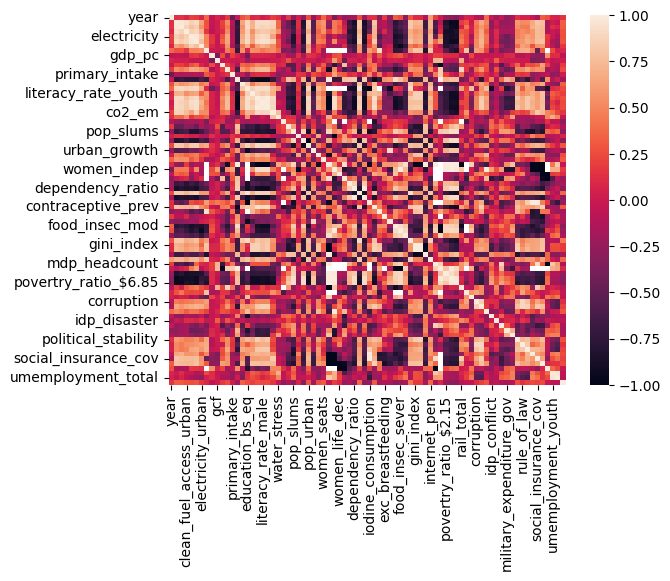

In [32]:
import seaborn as sns


sns.heatmap(corr)

In [60]:
select_lin_features = list(corr[(corr['best_fatality_estimate']>0.3) | (corr['best_fatality_estimate']<-0.3)]['best_fatality_estimate'].index)

# Data Preprocessing

In [79]:
df = dataset_conflict_socio_pol[select_lin_features]

## Handling Missing Values

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clean_fuel_access        698 non-null    float64
 1   clean_fuel_access_rural  698 non-null    float64
 2   compulsory_edu           734 non-null    float64
 3   women_seats              768 non-null    float64
 4   dependency_ratio_old     820 non-null    float64
 5   dependency_ratio_young   820 non-null    float64
 6   contraceptive_prev       228 non-null    float64
 7   broadband_sub            690 non-null    float64
 8   internet_pen             702 non-null    float64
 9   best_fatality_estimate   820 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 70.5 KB


In [81]:
#drop columns where 20% of data is missing
drop_thresh = int(df.shape[0]*0.80)
df.dropna(axis=1, thresh = drop_thresh, inplace=True)

<ipython-input-81-a349275e4830>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, thresh = drop_thresh, inplace=True)


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 819
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clean_fuel_access        698 non-null    float64
 1   clean_fuel_access_rural  698 non-null    float64
 2   compulsory_edu           734 non-null    float64
 3   women_seats              768 non-null    float64
 4   dependency_ratio_old     820 non-null    float64
 5   dependency_ratio_young   820 non-null    float64
 6   broadband_sub            690 non-null    float64
 7   internet_pen             702 non-null    float64
 8   best_fatality_estimate   820 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 64.1 KB


In [83]:
def smart_imputer(df):
  from sklearn.experimental import enable_iterative_imputer
  from sklearn.impute import IterativeImputer

  imptr = IterativeImputer(random_state=1)
  imptr.fit(df)
  return imptr

In [86]:
imputer = smart_imputer(df)
imputer.transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


(820, 9)

In [89]:
df = pd.DataFrame(data = imputer.transform(df), columns=imputer.get_feature_names_out())
df.head()

,clean_fuel_access,clean_fuel_access_rural,compulsory_edu,women_seats,dependency_ratio_old,dependency_ratio_young,broadband_sub,internet_pen,best_fatality_estimate
0,63.630260,34.662409,14.0,46.153846,7.675974,48.65254,9.334613,65.977379,43.0
1,82.917151,62.111540,14.0,15.204678,13.711080,29.39493,19.436461,80.690000,25.0
2,82.913566,62.107666,14.0,15.204678,13.711080,29.39493,19.436461,80.690000,38.0
3,82.917151,62.111540,14.0,15.204678,13.711080,29.39493,19.436461,80.690000,25.0
4,82.901983,62.095148,14.0,15.204678,13.711080,29.39493,19.436461,80.690000,80.0


In [90]:
X = df.iloc[:, :-1]
y= df.iloc[:, -1]
print(X.head())
print(y.head())

   clean_fuel_access  clean_fuel_access_rural  compulsory_edu  women_seats  \
0          63.630260                34.662409            14.0    46.153846   
1          82.917151                62.111540            14.0    15.204678   
2          82.913566                62.107666            14.0    15.204678   
3          82.917151                62.111540            14.0    15.204678   
4          82.901983                62.095148            14.0    15.204678   

   dependency_ratio_old  dependency_ratio_young  broadband_sub  internet_pen  
0              7.675974                48.65254       9.334613     65.977379  
1             13.711080                29.39493      19.436461     80.690000  
2             13.711080                29.39493      19.436461     80.690000  
3             13.711080                29.39493      19.436461     80.690000  
4             13.711080                29.39493      19.436461     80.690000  
0    43.0
1    25.0
2    38.0
3    25.0
4    80.0
Name: b

In [ ]:
#OneHotEncoding
#columns_to_scale = X.iloc[:, 1:].columns

#encoded_country = pd.get_dummies(X['country_code'], prefix='country').iloc[:, :-1]
#X.drop('country_code', axis=1, inplace=True)
#X = X.join(encoded_country)

In [91]:
#X_scaled = scaler.transform(X[columns_to_scale])
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [92]:
X.columns

Index(['clean_fuel_access', 'clean_fuel_access_rural', 'compulsory_edu',
       'women_seats', 'dependency_ratio_old', 'dependency_ratio_young',
       'broadband_sub', 'internet_pen'],
      dtype='object')

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

columns_to_scale = X.columns
ct = ColumnTransformer([('scaler', StandardScaler(), columns_to_scale)], remainder='passthrough')

In [94]:
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

columns_to_scale = df.columns
ct_df = ColumnTransformer([('scaler', StandardScaler(), columns_to_scale)], remainder='passthrough')

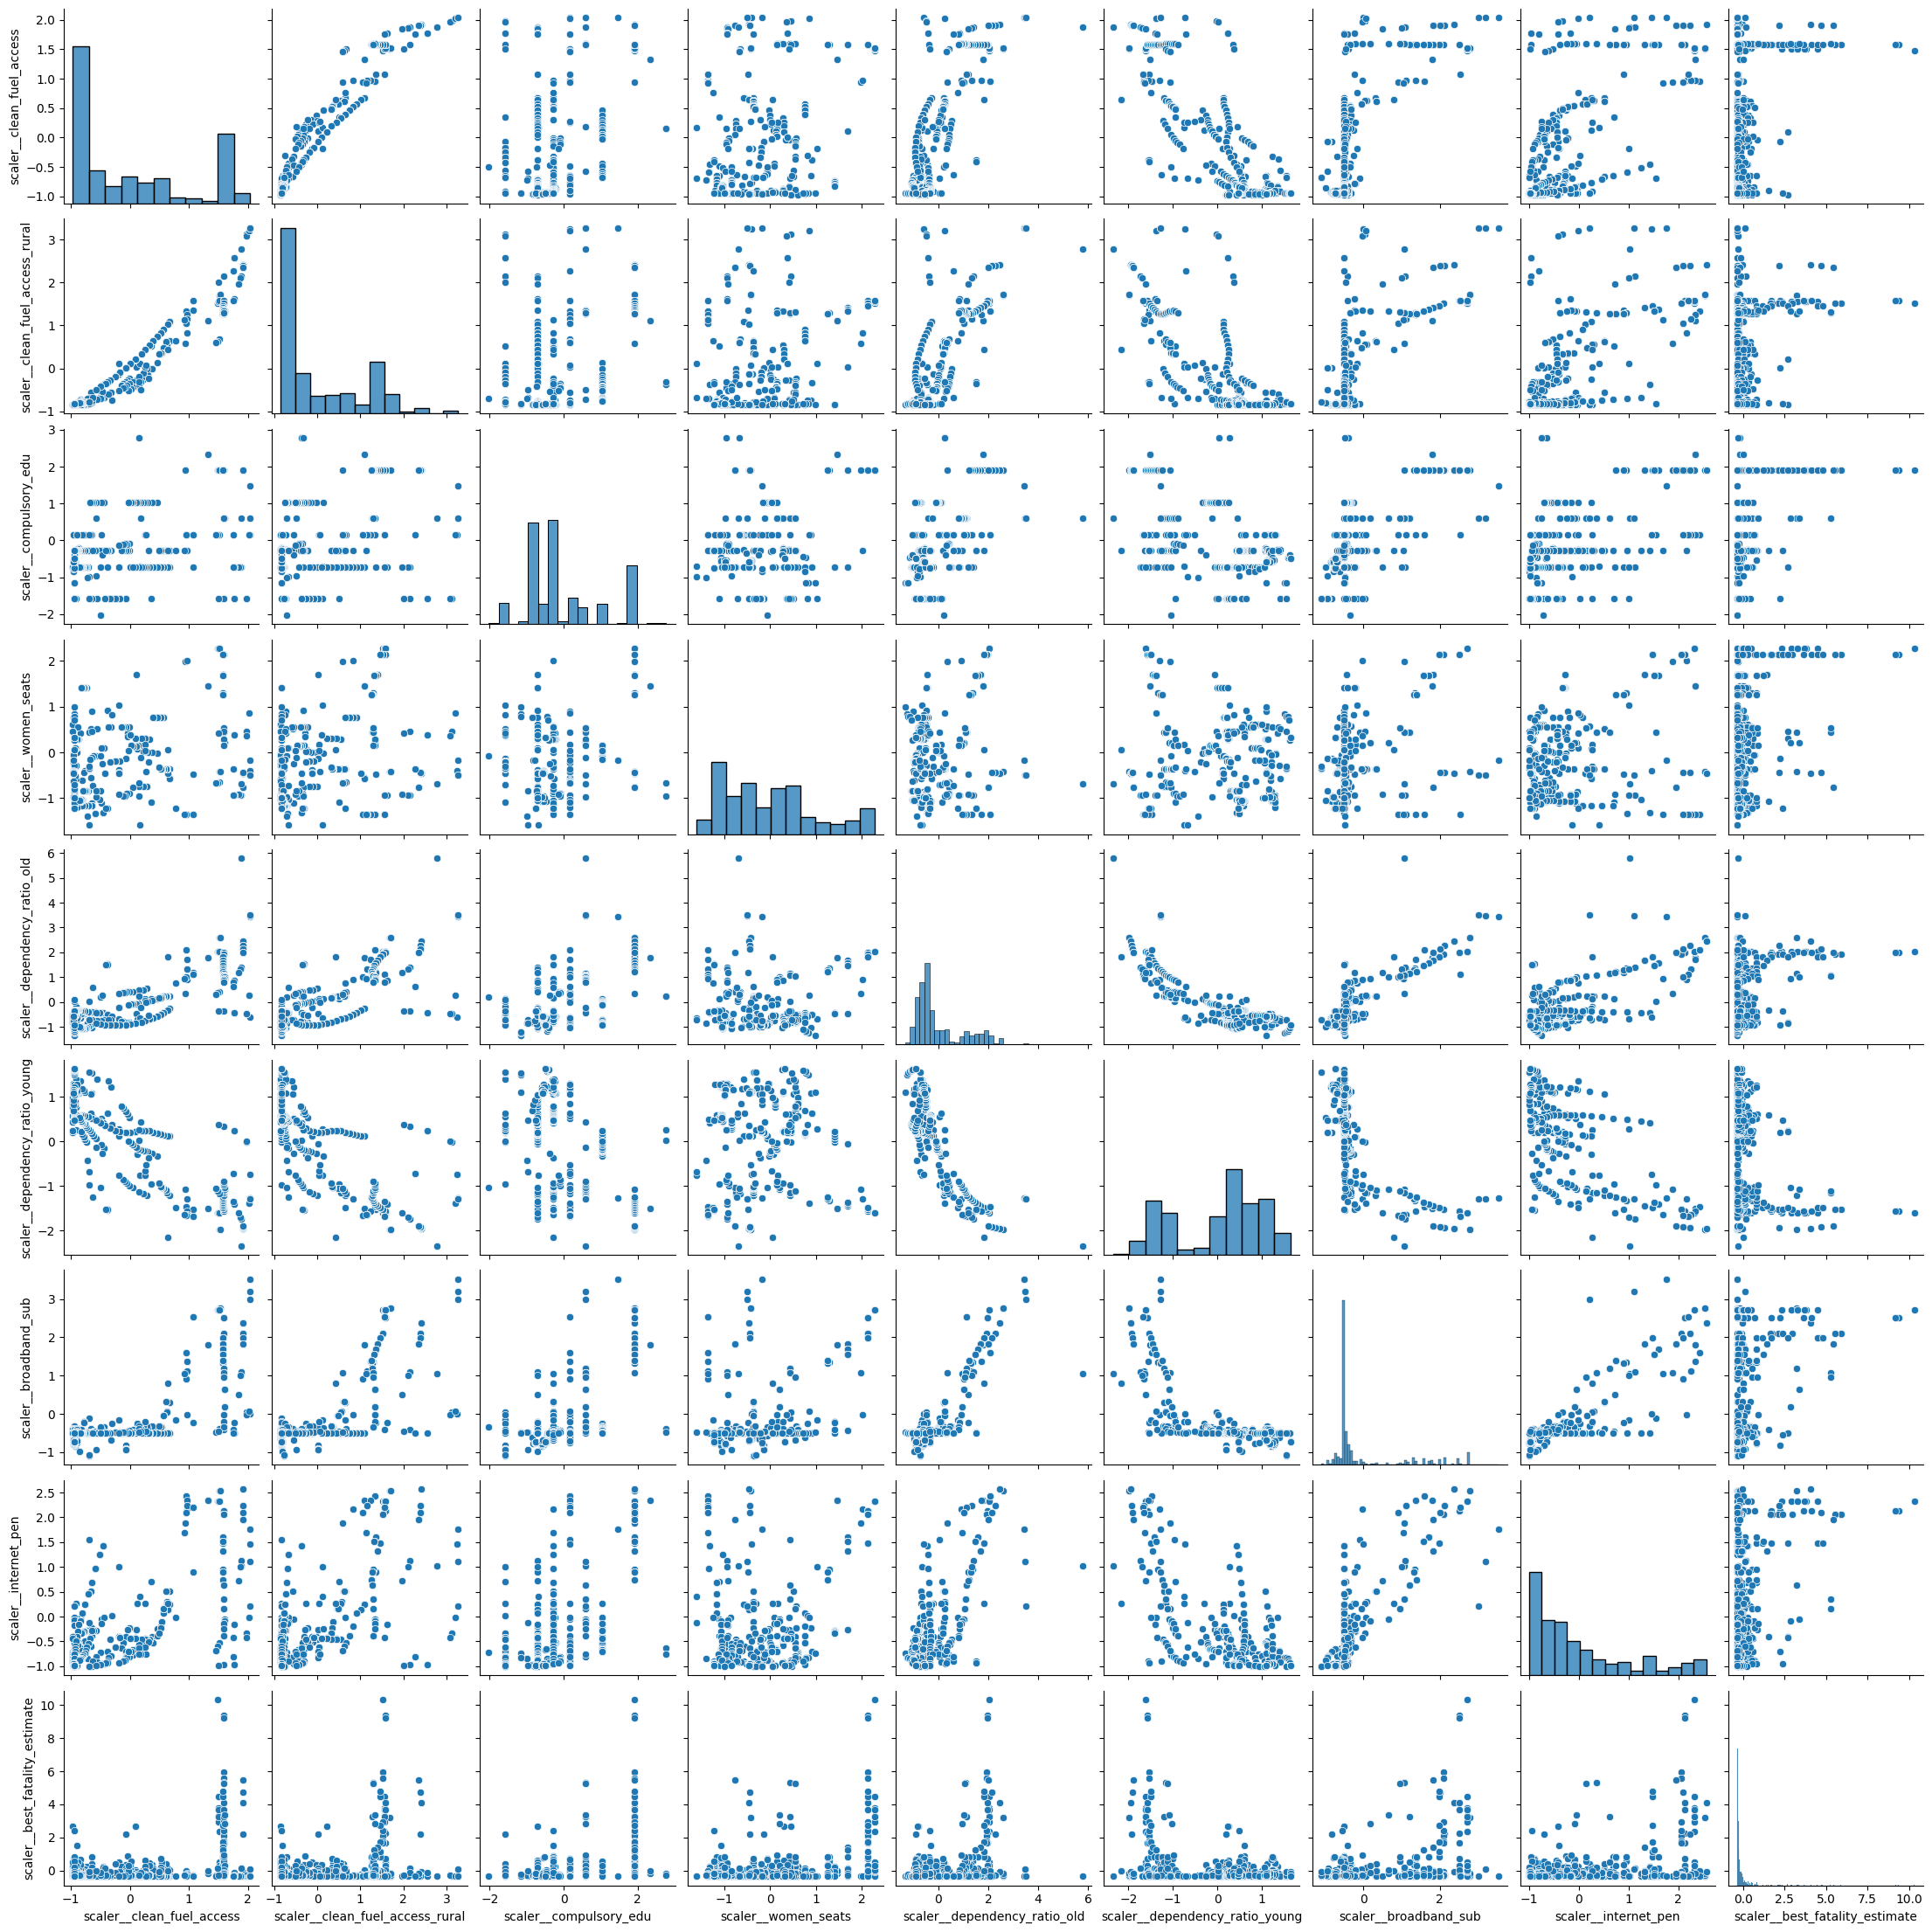

In [106]:
## EDA of df
import seaborn as sns

sns.pairplot(pd.DataFrame(data = ct_df.transform(df), columns=ct_df.get_feature_names_out()))

In [ ]:
sns.joinplot(x=df['scaler_clean_fuel_access'], y=df['scaler_best_fatality_estimate'], kind='hex')

## Hide

In [ ]:
#use knn imputer to impute missing data
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector

columns_to_impute = dataset_conflict_socio_pol.columns[dataset_conflict_socio_pol.isnull().any()].tolist()

ct = ColumnTransformer([('Imputer', KNNImputer(n_neighbors=5, add_indicator=True), columns_to_impute), 
 ('OneHotEncoder', OneHotEncoder(), make_column_selector(dtype_include=object))],
  remainder='drop')

transformer_imputer_cf_data = ct.fit(dataset_conflict_socio_pol)

In [ ]:
train_imputed = transformer_imputer_cf_data.transform(X_train)
test_imputed = transformer_imputer_cf_data.transform(X_test)

# Modelling

## SVR

In [95]:
X_train

array([[-0.940084  , -0.81952767, -0.53821956, ...,  1.12170543,
        -0.65697894, -0.95283218],
       [ 0.55111097,  0.37901149, -0.26823841, ..., -1.04853186,
        -0.31935543, -0.21273238],
       [ 1.97264772,  2.48977779,  1.9440232 , ..., -2.01364946,
         2.41743027,  2.60398037],
       ...,
       [-0.81929408, -0.71026238, -0.23795667, ...,  1.36633062,
        -0.48720334, -0.00779445],
       [-0.49996504, -0.65615689, -0.26823841, ...,  0.45015059,
        -0.48996591,  1.28010529],
       [-0.79337768, -0.75250376, -0.26823841, ...,  0.58561865,
        -0.49386578,  0.08584956]])

In [96]:
y_train

774     156.0
424     513.0
72     2041.0
317      28.0
700      68.0
        ...  
582      80.0
64       85.0
41       69.0
105      29.0
393      43.0
Name: best_fatality_estimate, Length: 656, dtype: float64

In [97]:
# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
def viz_mse(y_test, y_pred):

  # calculate errors
  errors = list()
  for i in range(len(y_test.values)):
    # calculate error
    err = abs((y_test.values[i] - y_pred[i]))
    # store error
    errors.append(err)
  # plot errors
  pyplot.plot(errors)
  pyplot.xticks(ticks=[i for i in range(len(errors))], labels=y_pred)
  pyplot.xlabel('y_pred Value')
  pyplot.ylabel('Mean Absolute Error')
  pyplot.show()

In [98]:
# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import tensorflow as tf

def viz_loss(y_test, y_pred, loss = tf.keras.losses.BinaryFocalCrossentropy(gamma=2,from_logits=True)):

  # calculate errors
  errors = list()
  for i in range(len(y_test.values)):
    # calculate error
    err = loss(y_test.values[i].reshape(-1,1), y_pred[i].reshape(-1,1)).numpy()
    # store error
    errors.append(err)
  # plot errors

  pyplot.plot(errors)
  pyplot.xticks(ticks=[i for i in range(len(errors))], labels=y_pred)
  pyplot.xlabel('y_pred Value')
  pyplot.ylabel('BinaryFocalCrossentropy')
  pyplot.show()

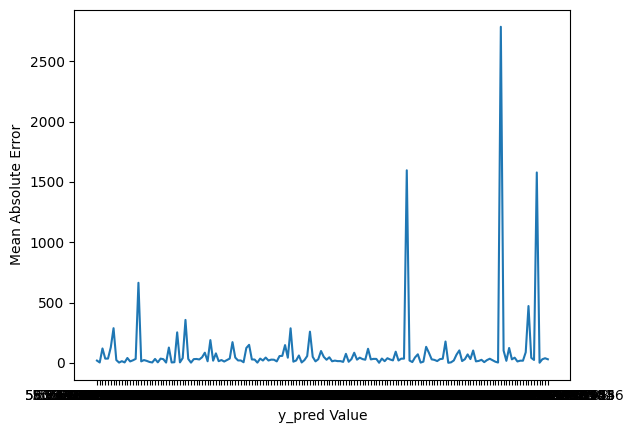

In [99]:
# SVM modelling of socio-pol to fatalities
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
viz_mse(y_test, y_pred)

## Linear Regression

In [100]:
X_train

array([[-0.940084  , -0.81952767, -0.53821956, ...,  1.12170543,
        -0.65697894, -0.95283218],
       [ 0.55111097,  0.37901149, -0.26823841, ..., -1.04853186,
        -0.31935543, -0.21273238],
       [ 1.97264772,  2.48977779,  1.9440232 , ..., -2.01364946,
         2.41743027,  2.60398037],
       ...,
       [-0.81929408, -0.71026238, -0.23795667, ...,  1.36633062,
        -0.48720334, -0.00779445],
       [-0.49996504, -0.65615689, -0.26823841, ...,  0.45015059,
        -0.48996591,  1.28010529],
       [-0.79337768, -0.75250376, -0.26823841, ...,  0.58561865,
        -0.49386578,  0.08584956]])

In [102]:
# Linear Model

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)


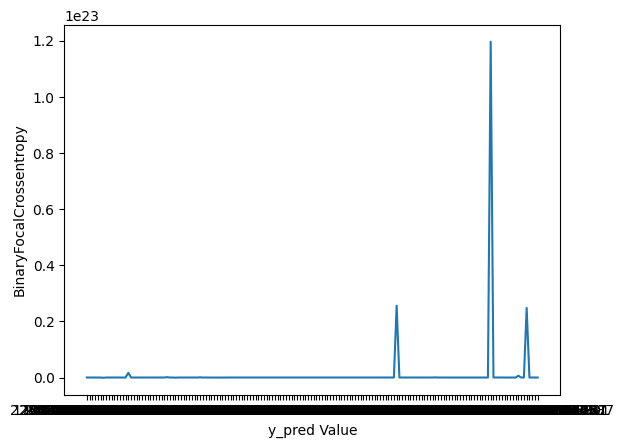

In [ ]:
viz_loss(y_test, y_pred)

## Probabilistic model

In [111]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(X_train,y_train)

GaussianNB()

In [112]:
y_pred = naive.predict(X_test)

In [113]:
y_pred

array([ 88., 101.,  81.,  25.,  29.,  47.,  47.,  25., 126.,  47.,  88.,
        27.,  47.,  29.,  85.,  43., 202., 202.,  25.,  47., 181.,  48.,
        81.,  81., 102.,  43.,  25.,  25.,  58.,  48.,  81.,  38.,  47.,
        25.,  81.,  81.,  50.,  81., 121.,  38., 121.,  38.,  81.,  47.,
       121., 121.,  81.,  25.,  79.,  47., 181.,  81.,  38.,  81.,  51.,
        74., 181., 181.,  38.,  50.,  81.,  38.,  47.,  52.,  25.,  47.,
        43., 126., 202.,  48.,  85.,  49.,  25., 181.,  81.,  53.,  43.,
        88., 181.,  25.,  88., 181.,  43.,  64., 181.,  50.,  85., 121.,
        25.,  25.,  85.,  48.,  47.,  81., 102.,  27.,  81., 121.,  48.,
        47.,  29.,  81., 158.,  81.,  29.,  47.,  88.,  81.,  52.,  85.,
       102.,  25., 181.,  53.,  25.,  48.,  81., 121., 202., 121.,  81.,
        81.,  88.,  25.,  81.,  64.,  48.,  81., 181., 121.,  47.,  81.,
       102., 121., 181.,  53.,  81., 102.,  46.,  88.,  47., 121.,  48.,
        48., 102., 102., 181.,  85.,  52.,  81.,  4

In [114]:
y_test

76       40.0
118      58.0
191     178.0
13       26.0
205      28.0
        ...  
39     1674.0
535      58.0
330      62.0
434      49.0
406      29.0
Name: best_fatality_estimate, Length: 164, dtype: float64

<Axes: ylabel='best_fatality_estimate'>

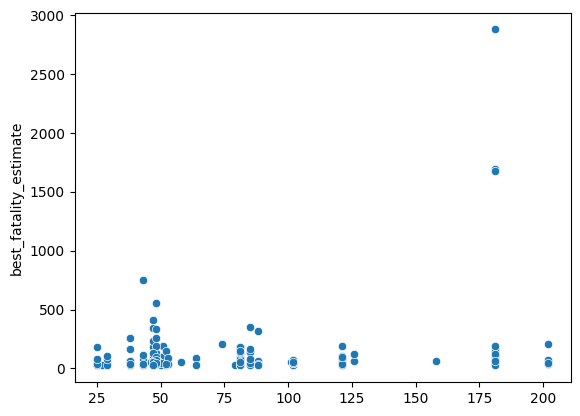

In [119]:
sns.scatterplot(x=y_pred, y=y_test)

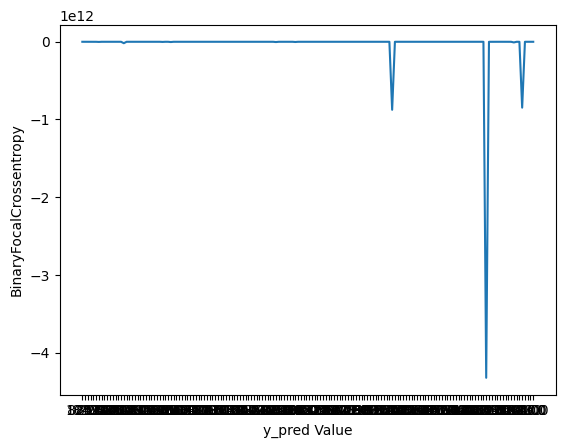

In [115]:
viz_loss(y_test, y_pred)

## Deep Neural Network

In [ ]:
train_scaled.shape

(656, 57)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy

deep_model = Sequential()
deep_model.add(Dense(200, input_shape=(train_scaled.shape[1],), activation='relu'))
deep_model.add(Dense(200, activation='relu'))
deep_model.add(Dense(100, activation='relu'))
deep_model.add(Dense(1, activation='relu'))

deep_model.compile(loss=BinaryCrossentropy(from_logits=True) , optimizer='adam', metrics=['accuracy'])


In [ ]:
deep_model.fit(train_scaled, y_train.values.reshape(-1,1), epochs=500, batch_size=100)

Epoch 1/500
7/7 [==============================] - 1s 6ms/step - loss: -65.7113 - accuracy: 0.0000e+00
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: -515.7726 - accuracy: 0.0000e+00
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: -1485.4478 - accuracy: 0.0000e+00
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: -3940.0161 - accuracy: 0.0000e+00
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: -9381.3271 - accuracy: 0.0000e+00
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: -19876.8828 - accuracy: 0.0000e+00
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: -39342.7969 - accuracy: 0.0000e+00
Epoch 8/500
7/7 [==============================] - 0s 7ms/step - loss: -72345.3281 - accuracy: 0.0000e+00
Epoch 9/500
7/7 [==============================] - 0s 6ms/step - loss: -132639.1406 - accuracy: 0.0000e+00
Epoch 10/500
7/7 [==============================] - 0

- It seems that no pattern is being detected by the neural network